In [1]:

#Goal of cell = goc
#goc, load in appropriate data 
import pandas as pd
import numpy as np
#empty list for txt file names
years = []
#columns followed by years
coln = [3,5,6,8,9,10,11,12,16,17,18,21,22,23,24,25,26,30,31,32,37,49,50,51,52,53,54,58,59,60,65]
colname = ['visitor','vgn','home','hgn','vscore','hscore','outs','d/n','park','at','time','vab','vhit','v2b','v3b','vhr','vrbi','vwalk','viwalk','vstrik','vlob','hab','hhit','h2b','h3b','hhr','hrbi','hwalk','hiwalk','hstrik','hlob']
#eventually we will run all the years with [i] at for filenames
#for i in range(len(years)):
mast = pd.read_csv('GL2015.TXT',sep=",",usecols= coln, names = colname)
mast.head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hab,hhit,h2b,h3b,hhr,hrbi,hwalk,hiwalk,hstrik,hlob
0,SLN,1,CHN,1,3,0,54,N,CHI11,35055.0,...,32,5,3,0,0,0,2,0,12,7
1,MIN,1,DET,1,0,4,51,D,DET05,45030.0,...,31,10,1,1,2,4,2,0,6,6
2,CLE,1,HOU,1,0,2,51,N,HOU03,43753.0,...,25,3,0,0,0,2,2,0,7,2
3,CHA,1,KCA,1,1,10,51,D,KAN06,40085.0,...,34,13,3,0,2,9,5,1,3,8
4,TOR,1,NYA,1,6,1,54,D,NYC21,48469.0,...,29,3,0,0,1,1,3,0,5,5


In [2]:
#visitor'' batting average
vavg = mast.iloc[:,12]/mast.iloc[:,11]
#doubles out of at bats
v2b_avg = mast.iloc[:,13] / mast.iloc[:,11]
#doubles out of hits
v2b_h = mast.iloc[:,13]/ mast.iloc[:,12]
#triples out of at bats
v3b_avg = mast.iloc[:,14] / mast.iloc[:,11]
#triples out of hits
v3b_h = mast.iloc[:,14]/mast.iloc[:,12]
#home runs out of at bats
vhr_avg = mast.iloc[:,15]/ mast.iloc[:,11]
#home runs out of hits
vhr_h = mast.iloc[:,15]/ mast.iloc[:,12]
#RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
vrbi_h = mast.iloc[:,16] / mast.iloc[:,12]
#walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
vw_ab = mast.iloc[:,17]/ mast.iloc[:,11]
#Intentional walk per at bat, a measure of how feared a team is
viw_ab = mast.iloc[:,18]/mast.iloc[:,11]
#strikeouts per at bat
vso_ab = mast.iloc[:,19]/mast.iloc[:,11]
#tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
vmh_ab = (mast.iloc[:,11] - (mast.iloc[:,19] + mast.iloc[:,12])) / mast.iloc[:,11]
#the number lob per hits, a measure of a teams inefficiency 
vlob_avg = mast.iloc[:,20]/(mast.iloc[:,11])

#home'' batting average
havg = mast.iloc[:,22]/mast.iloc[:,21]
#doubles out of at bats
h2b_avg = mast.iloc[:,23] / mast.iloc[:,21]
#doubles out of hits

h2b_h = mast.iloc[:,23]/ mast.iloc[:,22]
#triples out of at bats
h3b_avg = mast.iloc[:,24] / mast.iloc[:,21]
#triples out of hits
h3b_h = mast.iloc[:,24]/mast.iloc[:,22]
#home runs out of at bats
hhr_avg = mast.iloc[:,25]/ mast.iloc[:,21]
#home runs out of hits
hhr_h = mast.iloc[:,25]/ mast.iloc[:,22]
#RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
hrbi_h = mast.iloc[:,26] / mast.iloc[:,22]
#walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
hw_ab = mast.iloc[:,27]/ mast.iloc[:,21]
#Intentional walk per at bat, a measure of how feared a team is
hiw_ab = mast.iloc[:,28]/mast.iloc[:,21]
#strikeouts per at bat
hso_ab = mast.iloc[:,29]/mast.iloc[:,21]
#tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
hmh_ab = (mast.iloc[:,21] - (mast.iloc[:,29] + mast.iloc[:,22])) / mast.iloc[:,21]
#the number lob per hits, a measure of a teams inefficiency 
hlob_avg = mast.iloc[:,30]/(mast.iloc[:,21])

#adds ratios as columns
mast['vavg'] = vavg
cnames = ['v2ba','v2bh','v3ba','v3bh','vhra','vhrh','vrbih','vwa','viwa','vsoa','vfoa','vloba','havg','h2ba','h2bh','h3ba','h3bh','hhra','hhrh','hrbih','hwa','hiwa','hsoa','hfoa','hloba']
values = [v2b_avg,v2b_h,v3b_avg,v3b_h,vhr_avg,vhr_h,vrbi_h,vw_ab,viw_ab,vso_ab,vmh_ab,vlob_avg,havg,h2b_avg,h2b_h,h3b_avg,h3b_h,hhr_avg,hhr_h,hrbi_h,hw_ab,hiw_ab,hso_ab,hmh_ab,hlob_avg]
for c in range(len(cnames)):
    mast[cnames[c]]= values[c]

total = mast.iloc[:,4] + mast.iloc[:,5]
mast['totals']= total


In [3]:
winner = []
loser = []
for i in range(len(mast.iloc[:,0])):
    if mast.iloc[i,5] > mast.iloc[i,4]:
        winner.append(mast.iloc[i,2])
        loser.append(mast.iloc[i,0])
    else:
        winner.append(mast.iloc[i,0])
        loser.append(mast.iloc[i,2])
mast['winr'] = winner
mast['losr'] = loser
mast.head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hhrh,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,winr,losr
0,SLN,1,CHN,1,3,0,54,N,CHI11,35055.0,...,0.000000,0.000000,0.062500,0.000000,0.375000,0.468750,0.218750,3,SLN,CHN
1,MIN,1,DET,1,0,4,51,D,DET05,45030.0,...,0.200000,0.400000,0.064516,0.000000,0.193548,0.483871,0.193548,4,DET,MIN
2,CLE,1,HOU,1,0,2,51,N,HOU03,43753.0,...,0.000000,0.666667,0.080000,0.000000,0.280000,0.600000,0.080000,2,HOU,CLE
3,CHA,1,KCA,1,1,10,51,D,KAN06,40085.0,...,0.153846,0.692308,0.147059,0.029412,0.088235,0.529412,0.235294,11,KCA,CHA
4,TOR,1,NYA,1,6,1,54,D,NYC21,48469.0,...,0.333333,0.333333,0.103448,0.000000,0.172414,0.724138,0.172414,7,TOR,NYA


In [5]:
teams = mast.iloc[:,0].unique()
tn = len(teams)
teaml = teams.tolist() 
home = {}
visitor = {}
total = {}
for a in range(tn):
    home["team{0}".format(a)] = mast[mast['home']== teams[a]]
    visitor["team{0}".format(a)] = mast[mast['visitor']== teams[a]]
    total["team{0}".format(a)] = mast[(mast['visitor'] == teams[a]) | (mast['home'] == teams[a])]
home['team0'].head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hhrh,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,winr,losr
104,MIL,7,SLN,6,5,4,54,D,STL10,47875.0,...,0.0,0.333333,0.162162,0.027027,0.162162,0.594595,0.324324,9,MIL,SLN
132,MIL,8,SLN,7,2,4,51,N,STL10,40826.0,...,0.0,0.400000,0.029412,0.000000,0.117647,0.588235,0.205882,6,SLN,MIL
137,MIL,9,SLN,8,0,4,51,D,STL10,40079.0,...,0.0,0.363636,0.060606,0.000000,0.151515,0.515152,0.212121,4,SLN,MIL
152,CIN,10,SLN,9,1,6,51,N,STL10,46462.0,...,0.0,0.857143,0.068966,0.034483,0.344828,0.413793,0.103448,7,SLN,CIN
167,CIN,11,SLN,10,2,5,51,D,STL10,45906.0,...,0.1,0.500000,0.088235,0.058824,0.058824,0.647059,0.235294,7,SLN,CIN


In [37]:
(teams)

array(['SLN', 'MIN', 'CLE', 'CHA', 'TOR', 'TEX', 'ANA', 'BAL', 'SFN',
       'PIT', 'SDN', 'ATL', 'COL', 'BOS', 'NYN', 'KCA', 'DET', 'SEA',
       'HOU', 'LAN', 'CHN', 'TBA', 'WAS', 'NYA', 'OAK', 'MIA', 'CIN',
       'PHI', 'ARI', 'MIL'], dtype=object)

In [6]:
win = {}
loss = {}
for t in range(tn):
    win["team{}".format(t)] = []
    loss["team{}".format(t)] = []
    
for t in range(tn):
    gl = 0
    gw = 0
    for b in range(len(mast['winr'][:])):
        if teams[t] == mast['winr'][b] or teams[t] == mast['losr'][b]:
            if teams[t] == mast['winr'][b]:
                gw = gw + 1
                gl = gl + 0
                win["team{}".format(t)].append(gw)
                loss["team{}".format(t)].append(gl)
            else:
                gl = gl + 1
                gw = gw + 0
                loss["team{}".format(t)].append(gl)
                win["team{}".format(t)].append(gw)

In [40]:
a=win['team0']
b=win['team1']
c=win['team2']
d=win['team3']
e=win['team4']
f=win['team5']
g=win['team6']
h=win['team7']
i=win['team8']
j=win['team9']
k=win['team10']
l=win['team11']
m=win['team12']
n=win['team13']
o=win['team14']
p=win['team15']
q=win['team16']
r=win['team17']
s=win['team18']
t=win['team19']
u=win['team20']
v=win['team21']
w=win['team22']
x=win['team23']
y=win['team24']
z=win['team25']
a2=win['team26']
b2=win['team27']
c2=win['team28']
d2=win['team29']


teams

array(['SLN', 'MIN', 'CLE', 'CHA', 'TOR', 'TEX', 'ANA', 'BAL', 'SFN',
       'PIT', 'SDN', 'ATL', 'COL', 'BOS', 'NYN', 'KCA', 'DET', 'SEA',
       'HOU', 'LAN', 'CHN', 'TBA', 'WAS', 'NYA', 'OAK', 'MIA', 'CIN',
       'PHI', 'ARI', 'MIL'], dtype=object)

<Figure size 432x288 with 0 Axes>

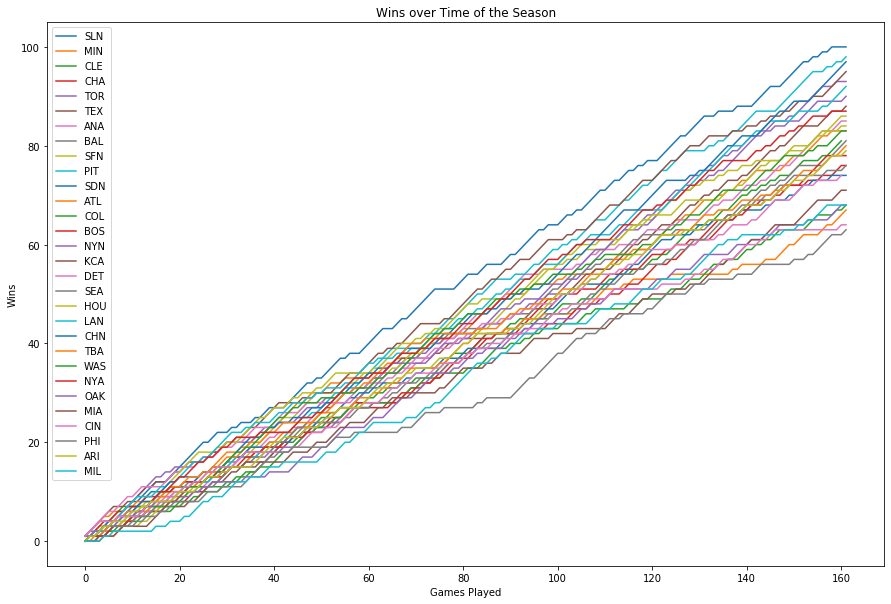

In [48]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.figure(figsize=(15,10))
plt.plot(a,label='SLN')
plt.plot(b,label='MIN')
plt.plot(c,label='CLE')
plt.plot(d,label='CHA')
plt.plot(e,label='TOR')
plt.plot(f,label='TEX')
plt.plot(g,label='ANA')
plt.plot(h,label='BAL')
plt.plot(i,label='SFN')
plt.plot(j,label='PIT')
plt.plot(k,label='SDN')
plt.plot(l,label='ATL')
plt.plot(m,label='COL')
plt.plot(n,label='BOS')
plt.plot(o,label='NYN')
plt.plot(p,label='KCA')
plt.plot(q,label='DET')
plt.plot(r,label='SEA')
plt.plot(s,label='HOU')
plt.plot(t,label='LAN')
plt.plot(u,label='CHN')
plt.plot(v,label='TBA')
plt.plot(w,label='WAS')
plt.plot(x,label='NYA')
plt.plot(y,label='OAK')
plt.plot(z,label='MIA')
plt.plot(a2,label='CIN')
plt.plot(b2,label='PHI')
plt.plot(c2,label='ARI')
plt.plot(d2,label='MIL')

plt.xlabel('Games Played')
plt.title('Wins over Time of the Season')
plt.ylabel('Wins')
plt.legend()

In [10]:

maskv = mast['visitor'] == 'SLN'
maskh = mast['home'] == 'SLN'

a = ((mast['vhrh'])[maskh])
b = ((mast['hhrh'])[maskh])

suma = np.sum(a)

sumb = np.sum(b)

avg = (np.sum(suma+sumb))/162
avg
   

0.08429888768941056

In [9]:
for i in cnames:
    (i)[maskv]

TypeError: string indices must be integers

In [8]:
a = ((cnames)[maskv])

TypeError: list indices must be integers or slices, not Series